In [117]:
from glob import glob 
import os 
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
import scipy
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos ,pi,arange
from scipy.fftpack import fft ,ifft
import scipy.signal
from sklearn.preprocessing import LabelEncoder

from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV


In [2]:
# #Read Data
# fileList = glob("/kaggle/input/eog-dataset/class/3-class/*.txt")
# src_dir = '/kaggle/input/eog-dataset/class/3-class'
# dst_dir = '/kaggle/working/newData'

# # Copy the entire directory to the destination directory
# shutil.copytree(src_dir, dst_dir)
# fileList = glob("/kaggle/working/newData/*.txt")

In [3]:
#Read Data
fileList = glob("/kaggle/working/newData/*.txt")

In [4]:
# fileList

In [5]:
for f in fileList:
    name = f.split("/")[-1]
    newName = "up"
    if "Yukar".casefold() in name.casefold():
        newName = name.replace("Yukar".casefold(),"up")
        
    elif "Asagi".casefold() in name.casefold():
        newName = name.replace("Asagi".casefold(),"down")
    
    elif "Sag".casefold() in name.casefold():
        newName = name.replace("Sag".casefold(),"right")
        
    elif "Sol".casefold() in name.casefold():
        newName = name.replace("Sol".casefold(),"left")
        
    elif "Kirp".casefold() in name.casefold():
        newName = name.replace("Kirp".casefold(),"blink")
    else:
        continue
   
        
    newFile = f.replace(name,newName)
    os.rename(f,newFile)

In [6]:
folder_path = "/kaggle/working/newData"

In [7]:
files = [file for file in glob(folder_path + '/*.txt') if 'örnek'not in file  and "Edit" not in file and  "edit" not in file and  "serkan" not in file and  "kayit" not in file]

In [8]:
file_paths = files

In [9]:
len(file_paths)

223

In [10]:
file_paths

['/kaggle/working/newData/upi17h.txt',
 '/kaggle/working/newData/upi19h.txt',
 '/kaggle/working/newData/right16v.txt',
 '/kaggle/working/newData/left15h.txt',
 '/kaggle/working/newData/right18v.txt',
 '/kaggle/working/newData/down10h.txt',
 '/kaggle/working/newData/right17v.txt',
 '/kaggle/working/newData/blink6h.txt',
 '/kaggle/working/newData/upı9h.txt',
 '/kaggle/working/newData/right11h.txt',
 '/kaggle/working/newData/upı15h.txt',
 '/kaggle/working/newData/blink2h.txt',
 '/kaggle/working/newData/upih.txt',
 '/kaggle/working/newData/down14v.txt',
 '/kaggle/working/newData/left12v.txt',
 '/kaggle/working/newData/right14h.txt',
 '/kaggle/working/newData/left19h.txt',
 '/kaggle/working/newData/down14h.txt',
 '/kaggle/working/newData/upı20h.txt',
 '/kaggle/working/newData/right13v.txt',
 '/kaggle/working/newData/upi6v.txt',
 '/kaggle/working/newData/upi7h.txt',
 '/kaggle/working/newData/blink1h.txt',
 '/kaggle/working/newData/upi13v.txt',
 '/kaggle/working/newData/right8v.txt',
 '/kaggl

In [11]:

data = []

for file in file_paths:
    with open(file, 'r') as f:
        values = [line.strip() for line in f]
        data.append(values)

df = pd.DataFrame(data)


In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,148,148,144,146,147,144,144,147,144,143,...,131,131,124,128,128,128,123,131,128,177
1,152,152,150,149,152,150,148,153,151,148,...,128,127,128,126,129,130,127,126,131,143
2,134,129,138,131,129,131,138,131,135,138,...,122,124,124,121,125,123,121,121,123,131
3,134,140,140,133,142,142,136,137,144,137,...,135,139,140,131,138,142,137,136,138,138
4,133,135,129,129,127,129,128,134,136,127,...,113,109,111,114,113,107,117,116,119,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,127,138,137,132,133,141,132,133,137,140,...,132,134,139,137,131,138,140,132,136,131
219,141,136,142,142,132,139,144,136,137,143,...,133,123,119,123,124,114,123,125,116,133
220,131,129,129,131,137,127,128,135,131,129,...,124,130,126,128,132,125,124,132,126,132
221,129,133,127,127,130,130,126,130,132,126,...,146,146,142,147,147,145,145,147,146,143


In [13]:
#extracting experiemnt number
import re

def extract_number_from_string(string):
    pattern = r'\d+'  # Matches one or more digits
    match = re.search(pattern, string)
    
    if match:
        return int(match.group())  # Returns the matched number as a string
    else:
        return 0  # If no match is found, return None

# Example usage
for f in file_paths:
    number = extract_number_from_string(f)

#     if  number == 8:
#         print(f)
  # Output: 25


In [14]:
# file_paths.sort(lambda x :extract_number_from_string(x))

In [15]:
file_paths

['/kaggle/working/newData/upi17h.txt',
 '/kaggle/working/newData/upi19h.txt',
 '/kaggle/working/newData/right16v.txt',
 '/kaggle/working/newData/left15h.txt',
 '/kaggle/working/newData/right18v.txt',
 '/kaggle/working/newData/down10h.txt',
 '/kaggle/working/newData/right17v.txt',
 '/kaggle/working/newData/blink6h.txt',
 '/kaggle/working/newData/upı9h.txt',
 '/kaggle/working/newData/right11h.txt',
 '/kaggle/working/newData/upı15h.txt',
 '/kaggle/working/newData/blink2h.txt',
 '/kaggle/working/newData/upih.txt',
 '/kaggle/working/newData/down14v.txt',
 '/kaggle/working/newData/left12v.txt',
 '/kaggle/working/newData/right14h.txt',
 '/kaggle/working/newData/left19h.txt',
 '/kaggle/working/newData/down14h.txt',
 '/kaggle/working/newData/upı20h.txt',
 '/kaggle/working/newData/right13v.txt',
 '/kaggle/working/newData/upi6v.txt',
 '/kaggle/working/newData/upi7h.txt',
 '/kaggle/working/newData/blink1h.txt',
 '/kaggle/working/newData/upi13v.txt',
 '/kaggle/working/newData/right8v.txt',
 '/kaggl

In [16]:
# sorted_list = sorted(file_paths, key=extract_number_from_string)

# for item in sorted_list:
#     print(item)

In [17]:
labels = []
experiment_num = []
channels = []

In [18]:
for f in file_paths:
    
    if "v" in f.casefold():
        channels.append('v')
        
    elif "h" in f.casefold():
        channels.append('h')
    
    

In [19]:

for f in file_paths:
    experiment_num.append(extract_number_from_string(f))    
    if "left" in f:
        labels.append("left")
        
    elif "right" in f:
#         r = "v" in f.casefold()
#         print (f'right class is v : {}')
        labels.append("right")
        
    elif "up" in f:
        labels.append("up")
        
    elif "down" in f:
        labels.append("down")
    
    elif "blink" in f:
        labels.append("blink")  

In [20]:
df["label"] = labels
df['channel'] = channels
df['experiment_num'] = experiment_num

In [21]:
df['channel'].value_counts()

h    123
v    100
Name: channel, dtype: int64

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,label,channel,experiment_num
0,148,148,144,146,147,144,144,147,144,143,...,128,128,128,123,131,128,177,up,h,17
1,152,152,150,149,152,150,148,153,151,148,...,126,129,130,127,126,131,143,up,h,19
2,134,129,138,131,129,131,138,131,135,138,...,121,125,123,121,121,123,131,right,v,16
3,134,140,140,133,142,142,136,137,144,137,...,131,138,142,137,136,138,138,left,h,15
4,133,135,129,129,127,129,128,134,136,127,...,114,113,107,117,116,119,148,right,v,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,127,138,137,132,133,141,132,133,137,140,...,137,131,138,140,132,136,131,blink,h,9
219,141,136,142,142,132,139,144,136,137,143,...,123,124,114,123,125,116,133,blink,h,16
220,131,129,129,131,137,127,128,135,131,129,...,128,132,125,124,132,126,132,down,v,9
221,129,133,127,127,130,130,126,130,132,126,...,147,147,145,145,147,146,143,down,h,8


In [23]:
blink_v = df[(df['label'] == 'blink') & (df['channel'] == 'v')].sort_values(by ='experiment_num',ascending = True)
blink_h = df[(df['label'] == 'blink') & (df['channel'] == 'h')].sort_values(by ='experiment_num',ascending = True)

In [24]:
up_h = df[(df['label'] == 'up') & (df['channel'] == 'h')].sort_values(by ='experiment_num',ascending = True)
up_v = df[(df['label'] == 'up') & (df['channel'] == 'v')].sort_values(by ='experiment_num',ascending = True)

In [25]:
down_h = df[(df['label'] == 'down') & (df['channel'] == 'h')].sort_values(by ='experiment_num',ascending = True)
down_v = df[(df['label'] == 'down') & (df['channel'] == 'v')].sort_values(by ='experiment_num',ascending = True)

In [26]:
right_h = df[(df['label'] == 'right') & (df['channel'] == 'h')].sort_values(by ='experiment_num',ascending = True)
right_v = df[(df['label'] == 'right') & (df['channel'] == 'v')].sort_values(by ='experiment_num',ascending = True)

In [27]:
left_h = df[(df['label'] == 'left') & (df['channel'] == 'h')].sort_values(by ='experiment_num',ascending = True)
left_v = df[(df['label'] == 'left') & (df['channel'] == 'v')].sort_values(by ='experiment_num',ascending = True)

In [28]:
# df[(df['experiment_num'] == 19)]

In [29]:
right_v

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,label,channel,experiment_num
105,136,127,137,138,133,134,138,135,132,138,...,132,120,121,125,116,118,0,right,v,1
164,118,117,118,116,113,123,122,118,121,118,...,125,120,127,120,124,121,121,right,v,2
131,119,121,114,113,113,109,113,119,113,112,...,125,129,128,130,133,128,172,right,v,3
201,132,127,132,130,128,128,132,125,125,132,...,121,124,119,121,125,121,0,right,v,4
160,125,120,127,130,124,129,129,122,123,130,...,121,117,118,114,111,121,116,right,v,5
59,122,124,119,118,116,123,123,121,120,119,...,98,102,102,98,108,101,128,right,v,6
64,136,131,128,133,125,128,130,131,127,132,...,129,120,127,123,126,122,102,right,v,7
24,118,116,126,119,123,121,123,118,119,124,...,118,110,111,116,111,98,110,right,v,8
184,136,132,136,136,139,136,135,136,129,131,...,123,123,118,124,121,117,136,right,v,9
196,117,120,118,122,122,118,122,122,119,122,...,127,123,123,119,120,123,117,right,v,10


In [30]:
# up_h['experiment_num'].isnull().sum()

In [31]:
#up_h.astype(float)
up_h['experiment_num'].fillna(up_h['experiment_num'].max()+1)
up_v['experiment_num'].fillna(up_v['experiment_num'].max()+1)

192     1
127     2
181     3
81      4
166     5
20      6
123     7
140     8
83      9
167    10
97     11
191    12
23     13
172    14
129    15
57     16
85     17
113    18
159    19
150    20
Name: experiment_num, dtype: int64

In [32]:
# blink_h

In [33]:
# concatenated_row = pd.concat([blink_h, blink_v], axis=1)

# # Convert the concatenated row into a dataframe and transpose it
# result = pd.DataFrame(concatenated_row)

In [34]:
# result


In [35]:
# up_v

In [36]:
# UP
arr1 =up_h.to_numpy()
arr2  = up_v.to_numpy()
length = arr1.shape[0] if  len(arr1) <= len(arr2) else arr2.shape[0]
up = np.concatenate((arr1[:length],arr2[:length]),axis = 1)

In [37]:
up.shape

(20, 508)

In [38]:
# blink
arr1 =blink_h.to_numpy()
arr2  = blink_v.to_numpy()

length = arr1.shape[0] if  len(arr1) <= len(arr2) else arr2.shape[0]
blink = np.concatenate((arr1[:length],arr2[:length]),axis = 1)



In [39]:
blink.shape

(20, 508)

In [40]:
#down
arr1 =down_h.to_numpy()
arr2  = down_v.to_numpy()

down = np.concatenate((arr1,arr2),axis = 1)

In [41]:
down.shape

(20, 508)

In [42]:
#left
arr1 =left_h.to_numpy()
arr2  = left_v.to_numpy()
left = np.concatenate((arr1,arr2),axis = 1)

In [43]:
left.shape

(20, 508)

In [44]:
#right
arr1 =right_h.to_numpy()
arr2  = right_v.to_numpy()
right = np.concatenate((arr1,arr2),axis = 1) # !!!! why

In [45]:
right.shape

(20, 508)

In [46]:
concatenated_array = np.concatenate((blink,up,down,right,left), axis=0)

# Create pandas DataFrame from the concatenated array
newData = pd.DataFrame(concatenated_array)

In [47]:
newData

,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,506,507
0,140,135,135,143,138,134,141,140,135,140,...,138,134,139,134,130,131,146,blink,v,1
1,134,142,140,133,141,142,133,140,143,136,...,113,115,115,113,113,111,119,blink,v,2
2,132,134,128,127,136,134,127,133,132,123,...,127,132,135,128,134,130,124,blink,v,3
3,122,125,131,126,122,132,130,122,129,133,...,124,130,134,132,138,129,133,blink,v,4
4,134,131,127,132,133,127,133,133,129,127,...,126,127,134,128,129,129,139,blink,v,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,134,140,147,139,137,146,143,137,144,145,...,111,114,113,116,113,115,140,left,v,16
96,145,141,137,144,144,137,142,144,139,138,...,117,122,125,117,124,120,144,left,v,17
97,129,135,136,130,136,137,134,132,139,137,...,147,145,151,140,152,138,141,left,v,18
98,133,140,137,130,140,138,132,137,142,133,...,132,139,136,133,134,140,154,left,v,19


In [48]:
# newData.to_csv("data.csv",index = False)

In [49]:
df = newData

In [50]:
df

,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,506,507
0,140,135,135,143,138,134,141,140,135,140,...,138,134,139,134,130,131,146,blink,v,1
1,134,142,140,133,141,142,133,140,143,136,...,113,115,115,113,113,111,119,blink,v,2
2,132,134,128,127,136,134,127,133,132,123,...,127,132,135,128,134,130,124,blink,v,3
3,122,125,131,126,122,132,130,122,129,133,...,124,130,134,132,138,129,133,blink,v,4
4,134,131,127,132,133,127,133,133,129,127,...,126,127,134,128,129,129,139,blink,v,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,134,140,147,139,137,146,143,137,144,145,...,111,114,113,116,113,115,140,left,v,16
96,145,141,137,144,144,137,142,144,139,138,...,117,122,125,117,124,120,144,left,v,17
97,129,135,136,130,136,137,134,132,139,137,...,147,145,151,140,152,138,141,left,v,18
98,133,140,137,130,140,138,132,137,142,133,...,132,139,136,133,134,140,154,left,v,19


In [51]:
df.drop(columns = [506,507],inplace = True)

In [52]:
 df.rename(columns={505: 'label'}, inplace=True)

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,label
0,140,135,135,143,138,134,141,140,135,140,...,140,131,138,134,139,134,130,131,146,blink
1,134,142,140,133,141,142,133,140,143,136,...,117,114,113,115,115,113,113,111,119,blink
2,132,134,128,127,136,134,127,133,132,123,...,131,131,127,132,135,128,134,130,124,blink
3,122,125,131,126,122,132,130,122,129,133,...,128,133,124,130,134,132,138,129,133,blink
4,134,131,127,132,133,127,133,133,129,127,...,130,125,126,127,134,128,129,129,139,blink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,134,140,147,139,137,146,143,137,144,145,...,121,121,111,114,113,116,113,115,140,left
96,145,141,137,144,144,137,142,144,139,138,...,125,123,117,122,125,117,124,120,144,left
97,129,135,136,130,136,137,134,132,139,137,...,150,143,147,145,151,140,152,138,141,left
98,133,140,137,130,140,138,132,137,142,133,...,134,134,132,139,136,133,134,140,154,left


### sample plots to discover data

In [54]:
Y=df.label

In [55]:
df = df.drop(columns = "label",axis = 1)

In [56]:
df

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,140,135,135,143,138,134,141,140,135,140,...,135,140,131,138,134,139,134,130,131,146
1,134,142,140,133,141,142,133,140,143,136,...,112,117,114,113,115,115,113,113,111,119
2,132,134,128,127,136,134,127,133,132,123,...,136,131,131,127,132,135,128,134,130,124
3,122,125,131,126,122,132,130,122,129,133,...,132,128,133,124,130,134,132,138,129,133
4,134,131,127,132,133,127,133,133,129,127,...,128,130,125,126,127,134,128,129,129,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,134,140,147,139,137,146,143,137,144,145,...,112,121,121,111,114,113,116,113,115,140
96,145,141,137,144,144,137,142,144,139,138,...,119,125,123,117,122,125,117,124,120,144
97,129,135,136,130,136,137,134,132,139,137,...,144,150,143,147,145,151,140,152,138,141
98,133,140,137,130,140,138,132,137,142,133,...,140,134,134,132,139,136,133,134,140,154


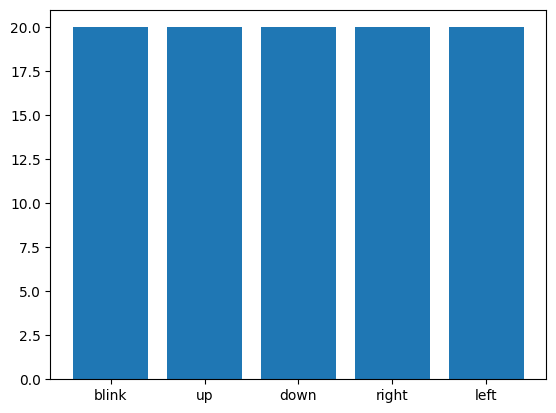

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
Y = Y.astype(str)
plt.bar(Y.unique(), Y.value_counts())
plt.show()


In [58]:
train_data = df

In [59]:
train_data.drop(columns = [251,252,253],inplace = True)

In [60]:
train_data=train_data.astype(float)

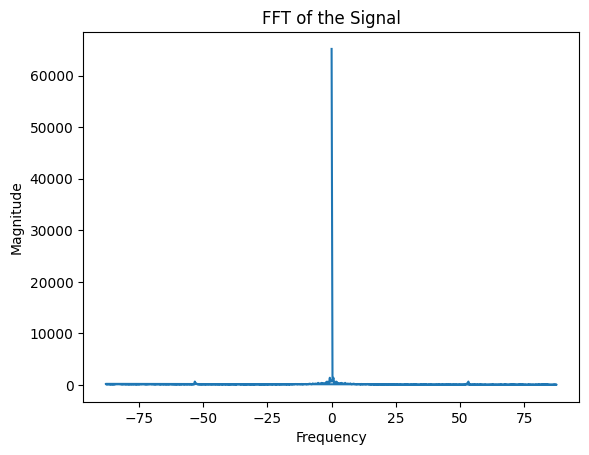

In [61]:
#compute fft to discover DC compontent

T = 1/176
# Extract the signal values
signal = np.array(train_data.iloc[0])

# Compute the FFT
fft_result = np.fft.fft(signal)

# Compute the corresponding frequency values
sampling_rate = 176  # Assuming the data is uniformly sampled with a rate of 1 (unit time)
n = np.arange(0,len(signal))
freq = n/T
# Plot the FFT result

frequency_axis = np.fft.fftfreq(len(signal), 1 / sampling_rate)

plt.plot(frequency_axis, np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT of the Signal')
plt.show()

#### conclusion there is exist DC compontent

In [62]:
# # Retrieve the mapping of original labels to encoded values
# label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# # Print the label mapping
# for label, encoded_value in label_mapping.items():
#     print(f"{label}: {encoded_value}")

# EDA before preprocessing

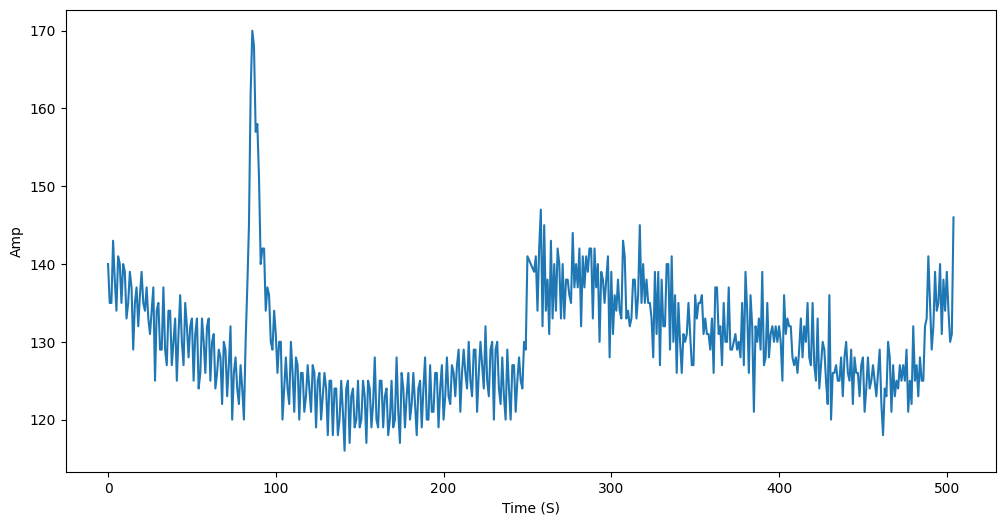

In [63]:
#  down signal example
plt.figure(figsize=(12,6))
plt.xlabel("Time (S)")
plt.ylabel("Amp")

plt.plot(train_data.iloc[0])

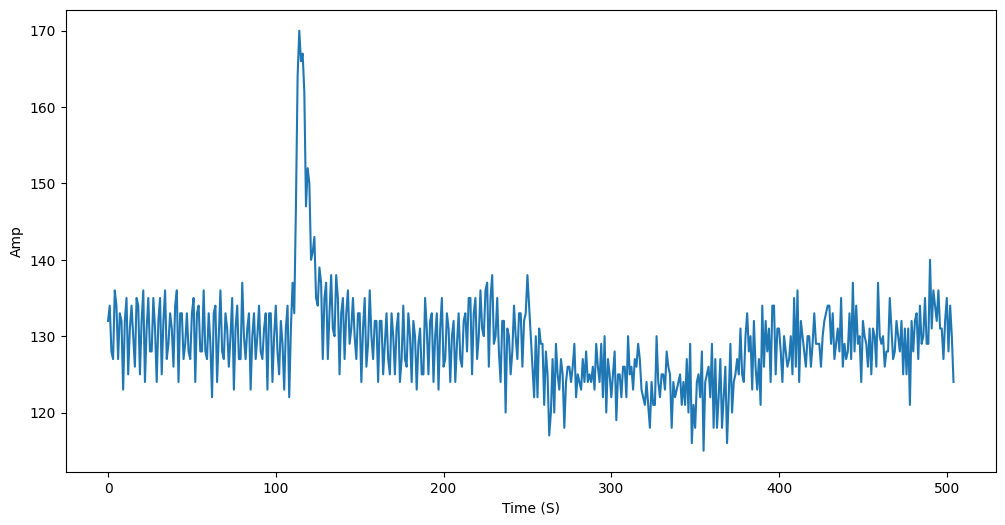

In [64]:
#UP signal example
plt.figure(figsize=(12,6))
plt.xlabel("Time (S)")
plt.ylabel("Amp")

plt.plot(train_data.iloc[2])

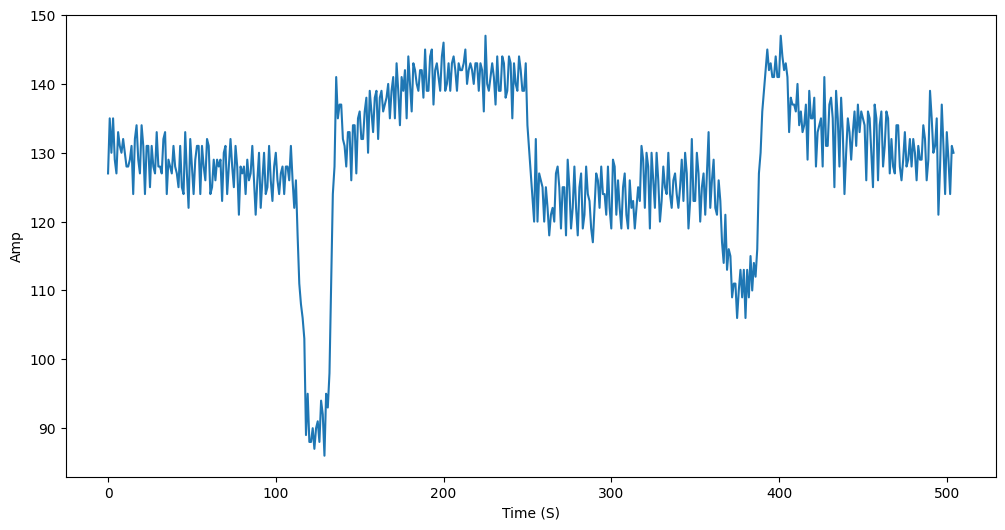

In [65]:
#left signal example
plt.figure(figsize=(12,6))
plt.xlabel("Time (S)")
plt.ylabel("Amp")

plt.plot(train_data.iloc[50])

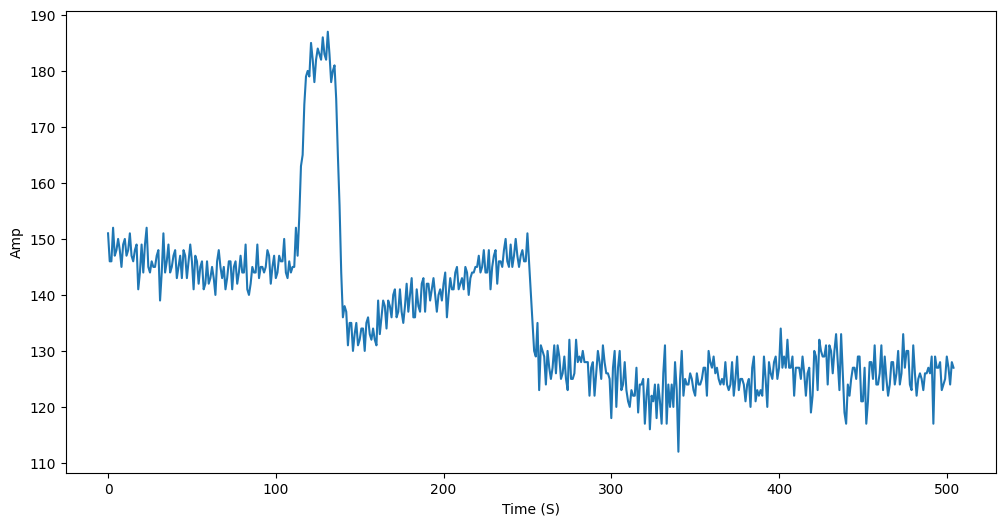

In [66]:
#Blink signal example
plt.figure(figsize=(12,6))
plt.xlabel("Time (S)")
plt.ylabel("Amp")

plt.plot(train_data.iloc[25])

# Preprocessing
* filtering using Band-pass filter
* resampling (down sampling) not required
* Normalzation(MINMAX scaler)
* Removing dc component 

# filtering

In [67]:
def butter_bandpass_filter(Input_Signal,LOW_Cutoff,High_cuttOff,Sampling_Rate,order):
    nyq = 0.5 *Sampling_Rate
    low = LOW_Cutoff/ nyq
    high = High_cuttOff / nyq
    Numerator,denominator = butter(order,[low,high],btype = "band",output = "ba",analog = False,fs = None)
    filtered = filtfilt(Numerator,denominator,Input_Signal)
    return filtered


In [68]:
filtered_Signal = butter_bandpass_filter(train_data,LOW_Cutoff=0.5,High_cuttOff=20.0,Sampling_Rate=176,order = 2)

In [69]:
filtered_Signal=pd.DataFrame(filtered_Signal)

Text(0, 0.5, 'Amp(V)')

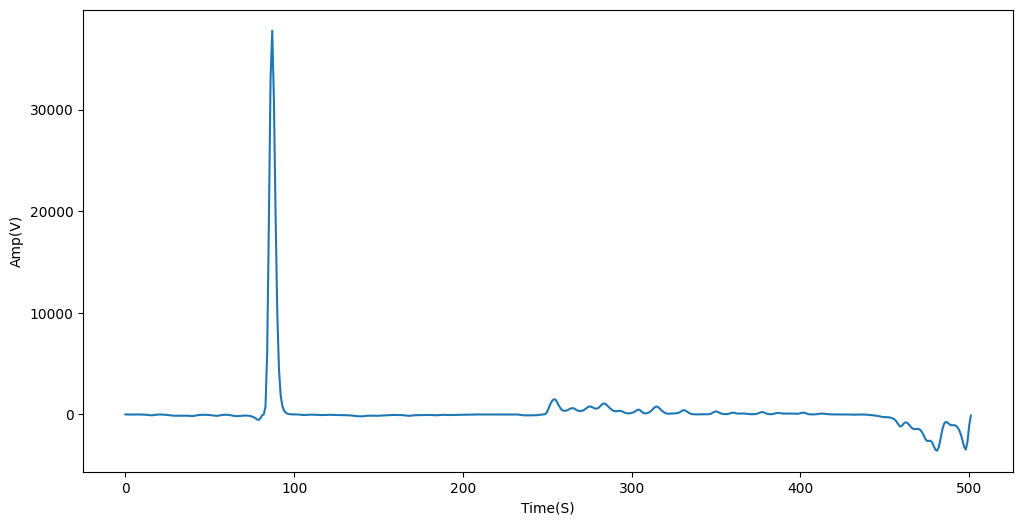

In [70]:
# Down after apply filter sampling rate = 251
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(filtered_Signal.iloc[0])),filtered_Signal.iloc[0]**3)
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

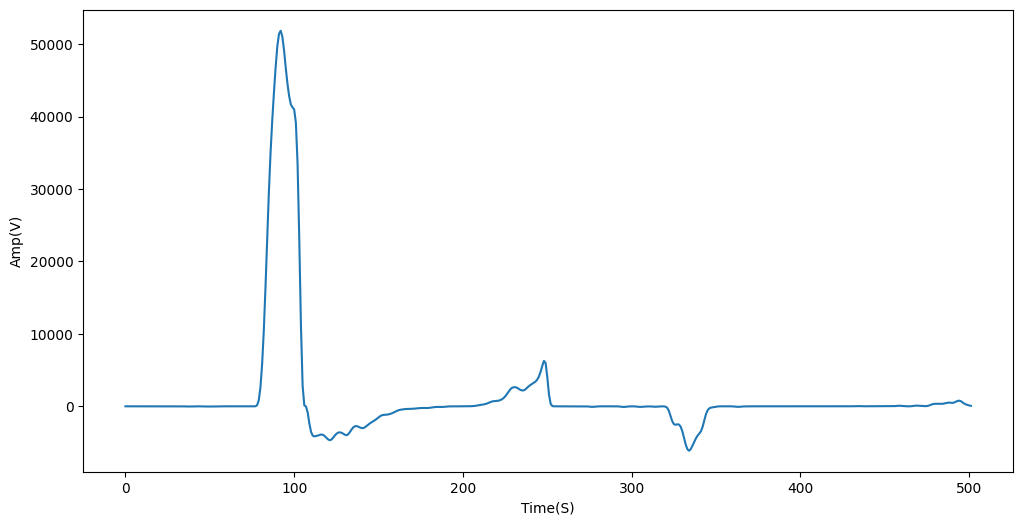

In [71]:
# filtering and ehancing by cubing 
# Down after apply filter sampling rate = 251
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(filtered_Signal.iloc[20])),filtered_Signal.iloc[20]**3)
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

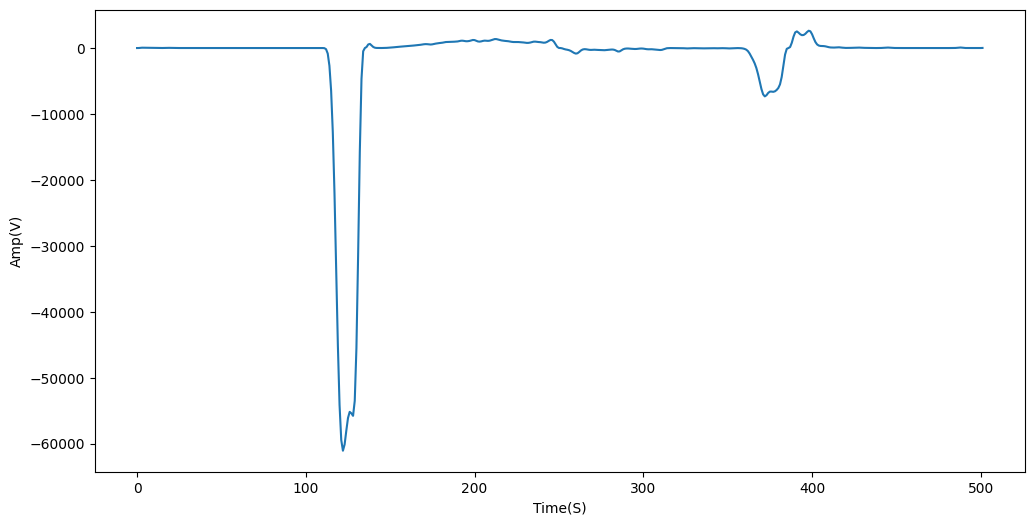

In [72]:
# Down after apply filter sampling rate = 176
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(filtered_Signal.iloc[50])),filtered_Signal.iloc[50]**3)
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

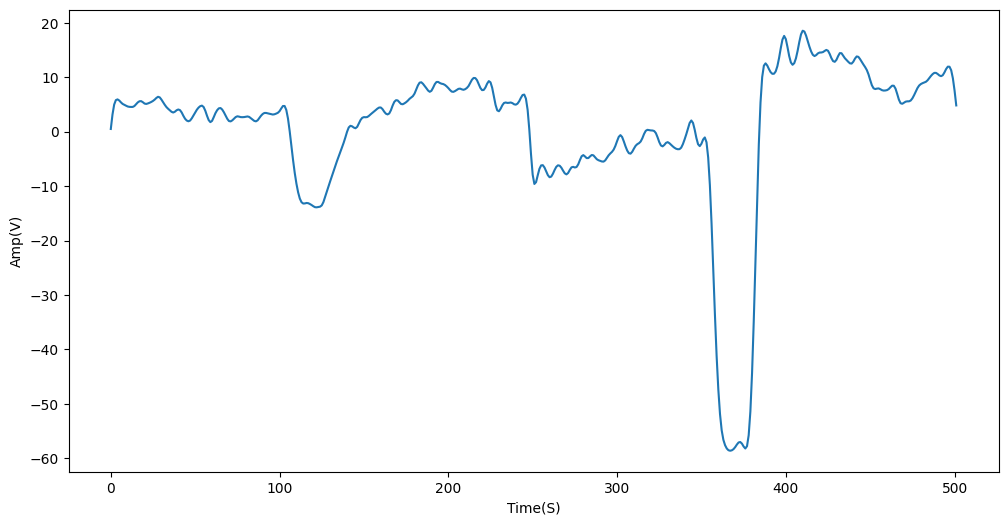

In [73]:
# up after apply filter
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(filtered_Signal.iloc[80])),filtered_Signal.iloc[80])
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

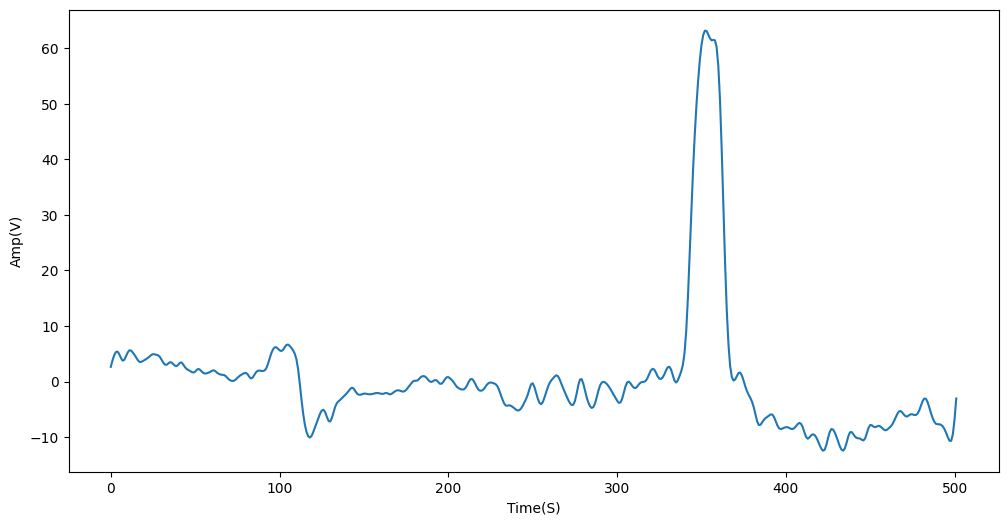

In [74]:
# left after apply filter
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(filtered_Signal.iloc[99])),filtered_Signal.iloc[75])
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

Text(0, 0.5, 'Amp(V)')

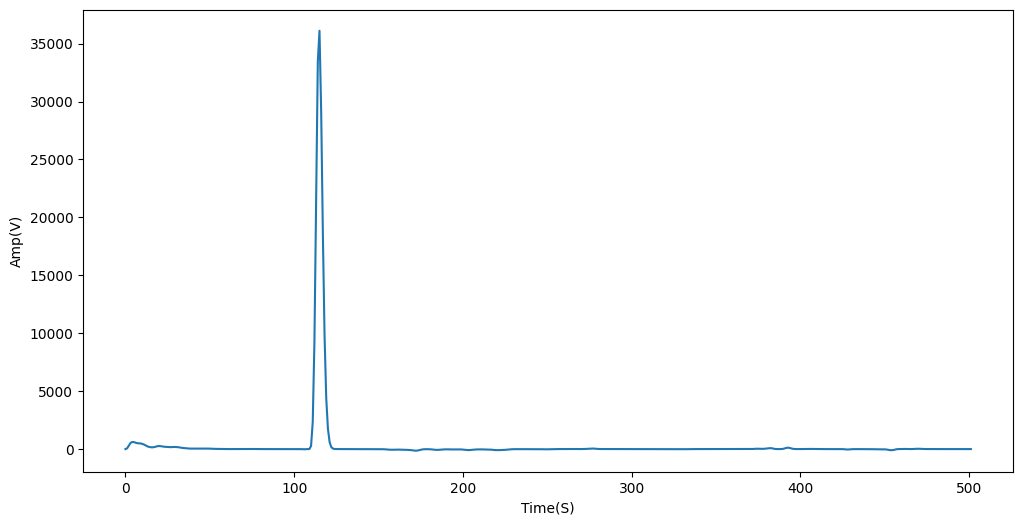

In [76]:
# Blink after apply filter
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(filtered_Signal.iloc[8])),filtered_Signal.iloc[8]**3)
plt.xlabel("Time(S)")
plt.ylabel("Amp(V)")

# Remove DC

In [75]:
data = np.array(filtered_Signal)
data = data.astype(float)
data_dct = data - np.mean(data)

In [76]:
data_dct=pd.DataFrame(data_dct)

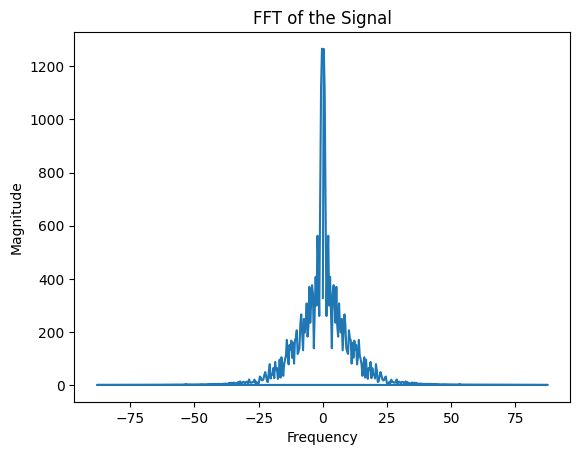

In [77]:
#compute fft to discover DC compontent

T = 1/176
# Extract the signal values
signal = np.array(data_dct.iloc[0])

# Compute the FFT
fft_result = np.fft.fft(signal)

# Compute the corresponding frequency values
sampling_rate = 176  # Assuming the data is uniformly sampled with a rate of 1 (unit time)
n = np.arange(0,len(signal))
freq = n/T
# Plot the FFT result

frequency_axis = np.fft.fftfreq(len(signal), 1 / sampling_rate)

plt.plot(frequency_axis, np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT of the Signal')
plt.show()

# Normalzation

In [78]:


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_dct)

# Create a new DataFrame with standardized data
train_data_normalized = pd.DataFrame(scaled_data, columns=filtered_Signal.columns)

# Print the standardized DataFrame

# Label data

In [80]:
# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the label column of the DataFrame
le.fit(Y)

# Transform the label column to encoded numeric values
labels = le.transform(Y)

# Feature Extraction
* Time Domain
* Frequency Domain

## Time Domain

## Frequency Domain

# PSD

In [152]:


# Apply PSD feature extraction on the training set
f, Pxx_den = signal.welch(data_dct, fs=176,nperseg =251)
X_train_psd =np.log10(Pxx_den)

# Apply PSD feature extraction on the testing set
# f, Pxx_den = signal.welch(X_test, fs=sr, nperseg=251)
# X_test_psd = np.log10(Pxx_den)

Text(0, 0.5, 'power_freq(dB/HZ)')

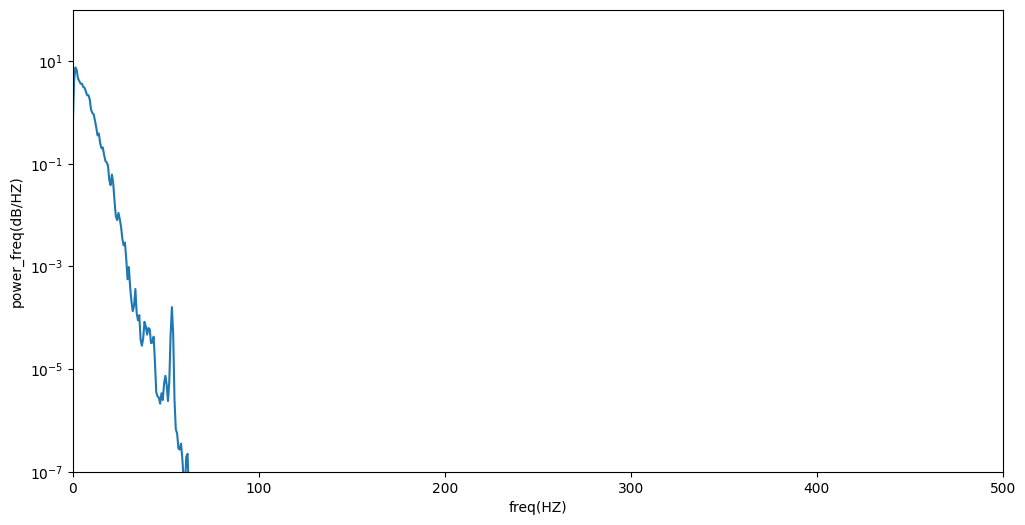

In [153]:
plt.figure(figsize=(12,6))
plt.semilogy(f,Pxx_den[2])
plt.xlim(0,500)
plt.ylim(1e-7,1e2)
plt.xlabel('freq(HZ)')
plt.ylabel('power_freq(dB/HZ)')

# Random Forest Classifier

In [154]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}
# Perform grid search with cross-validation
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(X_train_psd,  labels)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.8600000000000001


In [160]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(rf_classifier, X_train_psd, labels, cv=10)


# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [0.7 1.  0.7 0.7 0.8 0.9 1.  0.9 1.  0.7]
Mean score: 83.99999999999999
Standard deviation: 0.128062484748657


# Decsion Tree Classifier

In [122]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(dtc, X_train_psd, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [0.7 0.7 0.5 0.6 0.9 0.9 0.9 1.  0.6 0.9]
Mean score: 77.0
Standard deviation: 0.16155494421403513


# XGBClassifier

In [123]:
import xgboost as xgb

# create the XGBoost model
xgb= xgb.XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=100)
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(xgb, X_train_psd, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)




Cross-validation scores: [0.7 0.8 0.6 0.7 0.8 1.  0.8 0.9 0.9 1. ]
Mean score: 82.0
Standard deviation: 0.12489995996796799


# SVC

In [124]:
# Create an SVM classifier
svm = SVC(kernel='rbf', C=0.5, gamma=0.1)

# Perform cross-validation using 10 folds
cross_val_scores = cross_val_score(svm, X_train_psd, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [0.6 0.8 0.6 0.6 0.8 0.9 0.7 0.7 0.8 0.7]
Mean score: 72.0
Standard deviation: 0.09797958971132716


# Wavelet

In [125]:
import pywt
# Define wavelet function and level of decomposition
wavelet = 'db4'
level = 3
def apply_wavelet(row):
    coeffs = pywt.wavedec(row, wavelet, level=level)
    features = []
    for coeff in coeffs:
        features += coeff.tolist()
    return pd.Series(features)

# Apply wavelet decomposition to each row of the data
X = train_data_normalized.apply(apply_wavelet, axis=1)


# Random Forest Classifier

In [128]:
# Perform cross-validation using 5 folds
rf_model_2 = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
cross_val_scores = cross_val_score(rf_model_2, X, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [1.  1.  1.  0.9 0.7 1.  0.8 1.  1.  0.9]
Mean score: 93.0
Standard deviation: 0.1004987562112089


# Decsion Tree Classifier

In [137]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(dtc, X, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [0.8 0.5 0.7 0.8 0.6 0.6 0.8 0.8 0.9 0.9]
Mean score: 74.0
Standard deviation: 0.128062484748657


# XGBClassifier

In [138]:
import xgboost as xgb

# create the XGBoost model
xgb= xgb.XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=500)
# Perform cross-validation using 5 folds
cross_val_scores = cross_val_score(xgb, X, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean score:", mean_score*100)
print("Standard deviation:", std_score)

Cross-validation scores: [0.9 1.  0.9 0.9 0.7 1.  0.6 1.  1.  0.8]
Mean score: 88.00000000000001
Standard deviation: 0.13266499161421602


## Conclusion :wavelet feature extraction best from PSD 
## the best model accuracy random forest with accuracy=100%

In [139]:
import pywt
# Define wavelet function and level of decomposition
wavelet = 'db4'
level = 3
def apply_wavelet(row):
    coeffs = pywt.wavedec(row, wavelet, level=level)
    features = []
    for coeff in coeffs:
        features += coeff.tolist()
    return pd.Series(features)

# Apply wavelet decomposition to each row of the data
X = filtered_Signal.apply(apply_wavelet, axis=1)

In [141]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,labels, test_size=0.1)

In [144]:
# Train a random forest classifier on the PSD features
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 100.0


In [ ]:
# PSD

In [145]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_Signal,labels, test_size=0.1)

In [146]:
# Apply PSD feature extraction on the training set
f, Pxx_den = signal.welch(X_train, fs=176,nperseg =251)
X_train_psd =np.log10(Pxx_den)

# Apply PSD feature extraction on the testing set
f, Pxx_den = signal.welch(X_test, fs=176, nperseg=251)
X_test_psd = np.log10(Pxx_den)

#### Random Forest Classifier

In [148]:
# Train a random forest classifier on the PSD features
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)
clf.fit(X_train_psd, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_psd)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 100.0


In [ ]:
pd.DataFrame(y_train).to_csv("y_100train.csv",index = False)

In [ ]:
import pickle
with open('random_forest_model_final.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
X_test_psd=pd.DataFrame(X_test_psd)

In [ ]:
X_test_psd.to_csv("X_test_psd.csv",index = False)